# Predicting Diamond Prices

## Phase 2: Statistical Modelling

<br>


#### Group name: Group 27 <br>

#### Name & IDs of group members:
- Lavinia Beatriz Monteiro da Silva: s3939798 
- Joy El-Hayek: s3972828 
- Nicholas Sito: s3951974 
- Cristian Fota: s3785541 
- Shaikh Naima Labiba: s3954789

## Table of Contents 

  * [Introduction](#Introduction)
    + [Phase 1 Summary](#Phase-1-Summary)
    + [Report Overview](#Report-Overview)
    + [Overview of Methodology](#Overview-of-Methodology)
  * [Statistical Modelling](#Statistical-Modelling)
    + [Full Model Overview](#Full-Model-Overview)
    + [Full Model Diagnostic Checks](#Full-Model-Diagnostic-Checks)
    + [Feature Selection](#Feature-Selection)
    + [Reduced Model Overview](#Reduced-Model-Overview)
    + [Reduced Model Diagnostic Checks](#Reduced-Model-Diagnostic-Checks)
  * [Critique & Limitations](#Critique-&-Limitations)
  * [Summary & Conclusions](#Summary-&-Conclusions)
    + [Project Summary](#Project-Summary)
    + [Summary of Findings](#Summary-of-Findings)
    + [Conclusions](#Conclusions)

## Introduction

### Phase 1 Summary 

Through the Phase 1 of this project, we aimed to complete Data Preparation and Visualisation of the "Diamonds" dataset sourced from Kaggle, where nearly 54,000 diamonds were analysed. The Target Feature chosen for the study was the price of diamonds in US dollars, and the explanatory variables included Carat, Cut, Color, Clarity, Table, Price, Depth Percentage, Depth, Length, and Width. Presumptions such as that the dataset's rows were not associated were made, allowing us to utilise traditional predictive models such as multiple linear regression.

Within Phase 1, multiple data cleaning and preprocessing steps were taken, these steps include:

<b>1. Checking for missing values</b><br>
Upon checking, no missing values were found

<b>2. Checking for incorrect values for both numerical and categorical features</b><br>
This included checking for values that are inherently incorrect, such as negative values for prices or values that which were not listed as one of the options for categorical features. This examination indicated the existence of outliers for columns such as carat, price, width, depth, and length.

<b>3. Calculating and removing outliers</b><br>
All features mentioned above were checked for outliers and removed accordingly.

<b>4. Aggregation</b><br>
This step included encoding the categorical columns (cut, color, clarity). As all variables were ordinals, integer-encoding was completed.

<b>5. Renaming columns</b><br>
Columns that had confusing or non-descriptive names were renamed, this includes depth, x, y, and z, which were renamed to depth percentage, length, width and depth respectively. 

<b>6. Random Sampling</b><br>
As the dataset had a significant number of rows, a random sample of 500 rows was taken.

Subsequent to preprocessing steps, data exploration and visualisation was completed through a mix of univariable, two variable, and three variable plots. These plots helped explore the impact of various descriptive features on the price of diamonds. The visualisations included a range of graphs such as box plots, histograms, and scatter plots.

Through this exploration, we determined that the size of a diamond (evident through features such as length, width, depth and carat) had the most significant influence on price. Furthermore, other features such as cut and clarity also impacted price, where if diamonds of similar sizes were compared, the one with a greater score for either of the aforementioned features would have a greater price. Conversely, the clarity scores feature seemed to not have a notice impact on price. It was discovered that bigger diamonds often have lower clarity grades, however further investigation regarding this would be necessary to confirm this relationship.

### Report Overview 

To-do: write overview of content in phase 2 (maybe we could write this after finishing the rest of the project)

### Overview of Methodology

A detailed, complete, and accurate overview of your statistical modelling methodology (which is multiple linear regression). More specifically, in this subsection, you will provide a summary of your "Statistical Modelling" section below.


## Statistical Modelling 

(Statistical Modelling Section: Details of assumptions check, model selection, plots of residuals, and technical analysis of regression results.)

### Full Model Overview

Overview of your full model, including the variables and terms you are using in your model.

#### module import 

In [17]:
# this includes importing the "clean" version of the diamonds dataset 
# attained after the preprocessing in phase one

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('Phase2_Group27.csv')

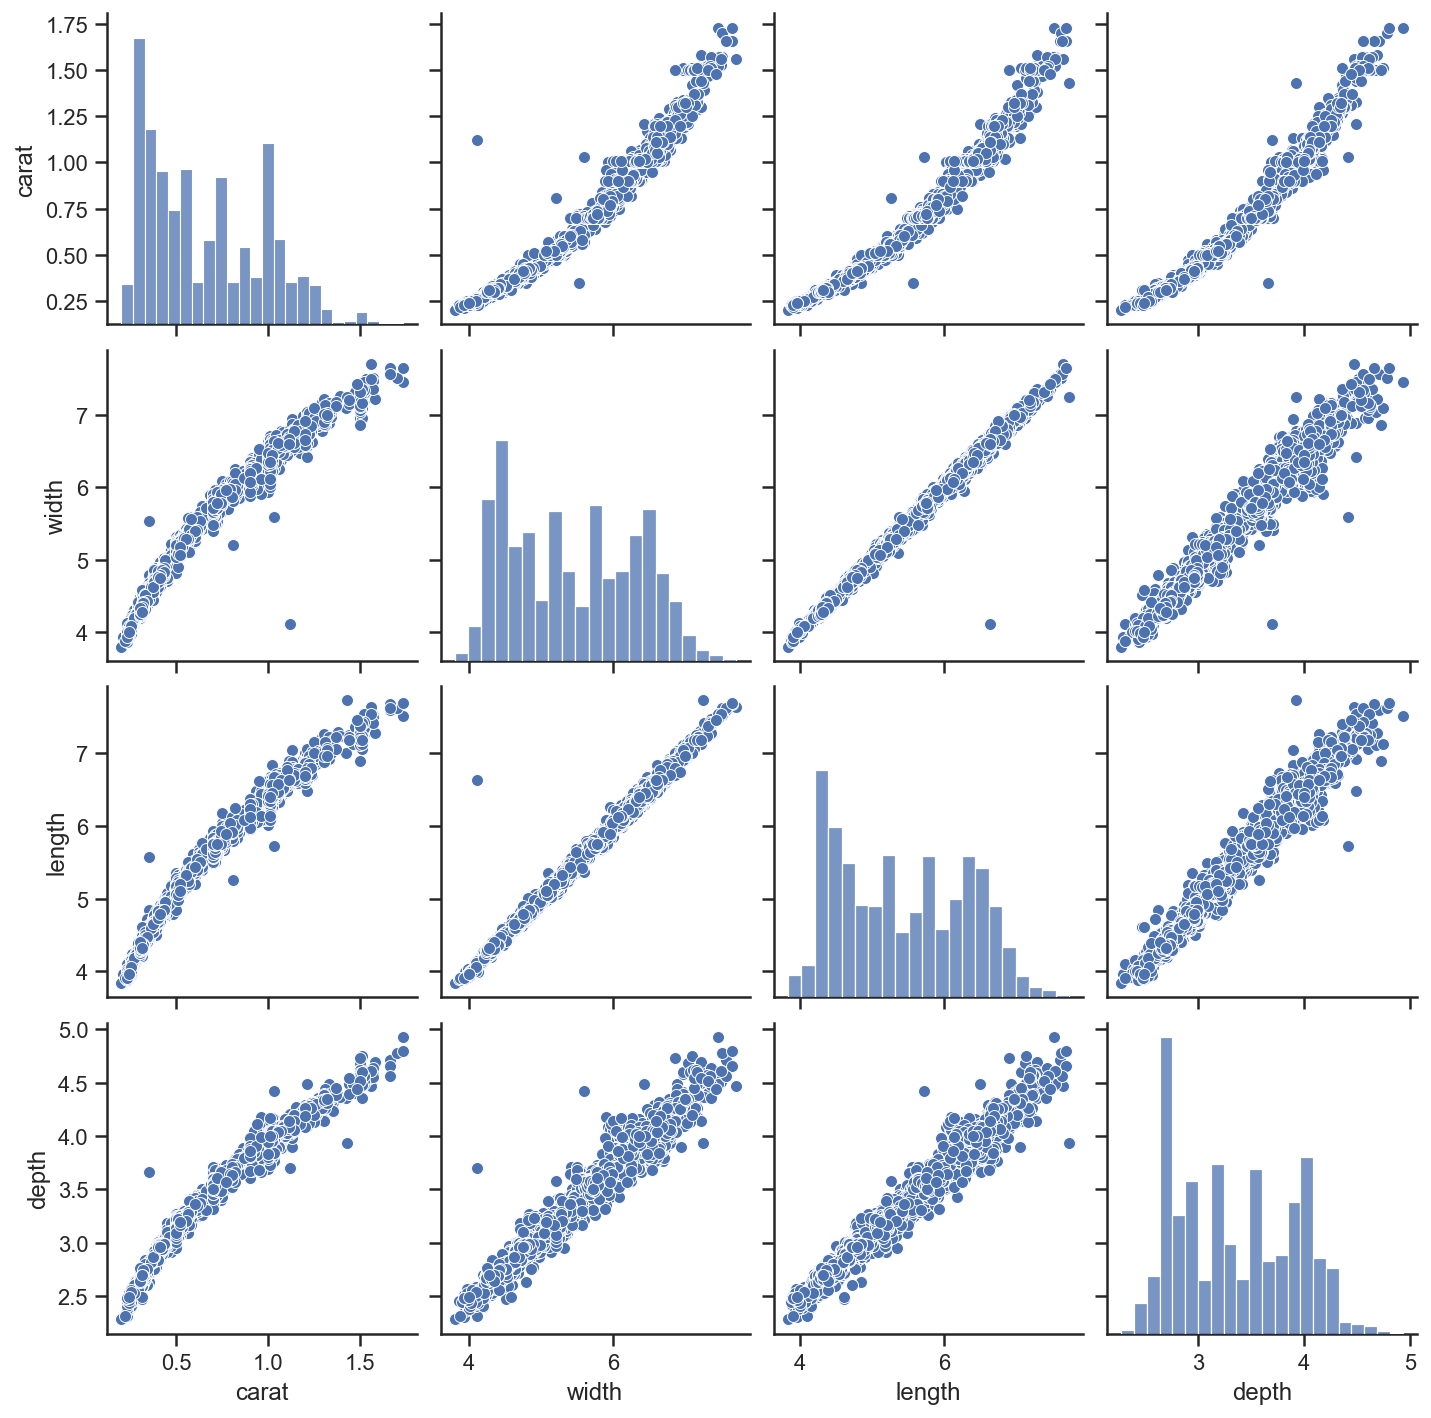

In [26]:
plt.rcParams['figure.figsize'] = (10,5)
sns.set(style="ticks", color_codes = True)

sns.pairplot(df, vars = ['carat','width','length','depth'])
plt.show();

In [22]:
df = df.rename(columns = {'depth percentage': 'depth_percentage'})
df.sample(5, random_state=999)

,carat,cut,color,clarity,depth_percentage,table,length,width,depth,price
3581,1.00,3,5,2,58.5,59.0,6.62,6.51,3.84,3450
3035,0.33,3,1,8,62.1,58.0,4.39,4.43,2.74,694
2455,0.75,3,4,4,59.6,59.0,6.04,5.94,3.57,2835
3014,0.30,1,6,2,63.3,57.0,4.26,4.30,2.71,447
3114,0.31,4,6,3,61.7,55.0,4.37,4.41,2.71,565


In [24]:
formula_string = "price ~ carat + color + cut + clarity + depth_percentage + table + length + width + depth"

model = sm.formula.ols(formula = formula_string, data = df)
model_fitted = model.fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     6309.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:34:55   Log-Likelihood:                -38565.
No. Observations:                5000   AIC:                         7.715e+04
Df Residuals:                    4990   BIC:                         7.721e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2499.5156   2158.960  

In [25]:
print(f'R-squared = {model_fitted.rsquared:.4f}')
print(f'Adj. R-squared = {model_fitted.rsquared_adj:.4f}')

R-squared = 0.9192
Adj. R-squared = 0.9191


### Full Model Diagnostic Checks

You need to check whether there are indications of violations of the regression assumptions for the full model.

### Feature Selection 

perform backward feature selection using p-values

### Reduced Model Overview

Overview of your reduced model, including the variables and terms you are using in your model.

### Reduced Model Diagnostic Checks

You need to check whether there are indications of violations of the regression assumptions for the reduced model.

## Critique & Limitations

Critique & Limitations of your approach: strengths and weaknesses in detail.

## Summary & Conclusions

### Project Summary

A comprehensive summary of your entire project (both Phase 1 and Phase 2). That is, what exactly did you do in your project? (Example: I first cleaned the data in such and such ways. And then I applied multiple linear regression techniques in such and such ways. etc).

### Summary of Findings

A comprehensive summary of your findings. That is, what exactly did you find about your particular problem?

### Conclusions

Your detailed conclusions as they relate to your goals and objectives.